# Analytic Geometry

In this exercise, we will explore the details of tracking a particle through a two-dimensional analytic geometry. All parts of the exercise should be started on paper. Once the necessary relations are determined, you will use the Jupyter notebook to plot the curves and randomly sample the path of a particle as it moves through the geometry.

Please submit your handwritten work and notebook file in a zip file named `<last_name>_exercise5`.

## I. Surface specification

On paper, create analytic expressions for:

1. an ellipse (origin at (0,0)) whose minor axis is parallel to the y axis (full length 5 cm) and whose major axis is parallel to the x axis (full length 10 cm).
2. a line with slope m = −0.6 and a vertical offset of 0.2 cm.
3. a line that is parallel to the y axis with an offset of +3 cm along the x axis.
4. a circle centered at (2.5,0) with a radius of 1 cm.

Determine all the intersection points for these curves by hand. Plot each of these curves and their intersection points in the cells below. (Hint: it may be easiest to plot the ellipse and circle in two halves.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. an ellipse (origin at (0,0)) whose minor axis is parallel to the y axis (full length 5 cm) and whose major axis is parallel to the x axis (full length 10 cm).

$\frac{x^2}{5^2} + \frac{y^2}{2.5^2} = 1$

2. a line with slope m = −0.6 and a vertical offset of 0.2 cm.

$ y = -0.6x + 0.2$

3. a line that is parallel to the y axis with an offset of +3 cm along the x axis.

$x=3$

4. a circle centered at (2.5,0) with a radius of 1 cm.

$(x-2.5)^2 + y^2 = 1$

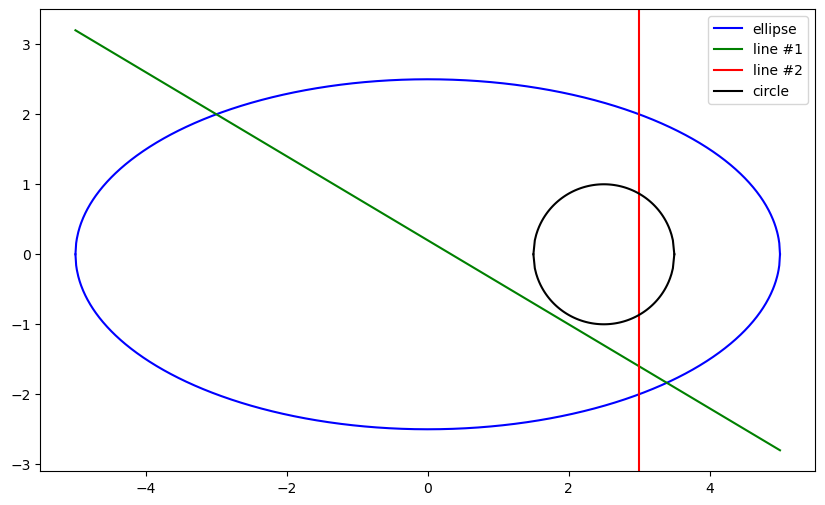

In [2]:
def plot_geometry():
    ax = plt.figure(figsize=(10,6))
    x = np.linspace(-5,5,1000)
    ellipse = 2.5 * np.sqrt(1 - x**2 / 5**2)
    plt.plot(x,ellipse, color="blue", label="ellipse")
    plt.plot(x,-ellipse, color="blue")

    x2 = np.linspace(-6,6,1000)
    plt.plot(x, -0.6*x + 0.2, label="line #1", color="green")

    plt.axvline(3, label="line #2", color="red")

    x3 = np.linspace(1.5,3.5, 100)
    circle = np.sqrt(1 - (x3 - 2.5)**2)
    plt.plot(x3, circle, label="circle", color="black")
    plt.plot(x3, -circle, color="black")

plot_geometry()
plt.legend()
plt.show()

There are 5 intersection points to be found:

1. line #1 with ellipse at x < 0

$\frac{x^2}{5^2} + \frac{y^2}{2.5^2} = 1$

$ y = -0.6x + 0.2$

$\frac{x^2}{5^2} + \frac{(0.2-0.6x)^2}{2.5^2} = \frac{x^2}{5^2} + \frac{(2-6x)^2}{25^2} = \frac{25x^2}{25^2} + \frac{(2-6x)^2}{25^2}= 1$

$25x^2 + (2-6x)^2 - 25^2 = 25x^2 + 36x^2 - 24x +4 - 25^2 = 61x^2 - 24x - 621 = 0$

$x = \frac{24 \pm \sqrt{24^2 - 4(-621)(61)}}{2(61)}$

See solution in code below

2. line #1 with ellipse at x > 0

See solution in code below

3. line #1 with line #2

$y = -0.6x +0.2$

$x_3=3$

See solution in code below

4. line #2 with circle at y > 0

$(x-2.5)^2 + y^2 = 1$

$y = \sqrt{(1- (x-2.5)^2)}$

$x_4 = 3$

See solution in code below

5. line #2 with circle at y < 0

See solution in code below

6. line #2 with ellipse at y> 0

$\frac{x^2}{5^2} + \frac{y^2}{2.5^2} = 1$

$\frac{25x^2}{25^2} + \frac{10y^2}{25^2} = 1$

$y = \frac{\sqrt{25^2-25x^2}}{10}$

See solution in code below

7. line #2 with ellipse at y < 0

See solution in code below



Intersection point #1: (-3.0,1.9999999999999998)
Intersection point #2: (3.3934426229508197,-1.8360655737704918)
Intersection point #3: (3.0,-1.5999999999999999)
Intersection point #4: (3.0,0.8660254037844386)
Intersection point #5: (3.0,-0.8660254037844386)
Intersection point #6: (3.0,2.0)
Intersection point #7: (3.0,-2.0)


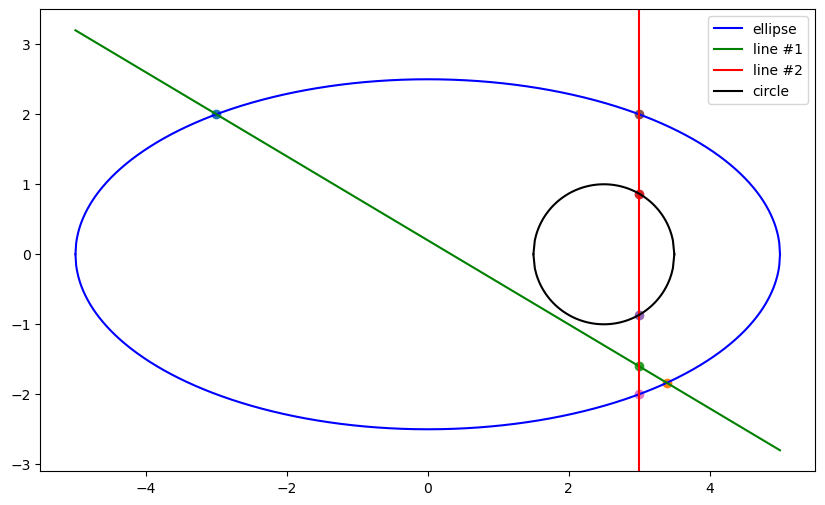

In [23]:
x1 = np.zeros(7)
y1 = np.zeros(7)

# line #1 with ellipse
A = 61
B = -24
C = -621
x1[0] = (24 - np.sqrt(B*B - 4*A*C))/(2*A)
y1[0] = -0.6*x1[0] + 0.2
x1[1] = (24 + np.sqrt(B*B - 4*A*C))/(2*A)
y1[1] = -0.6*x1[1] + 0.2

# line #1 with line #2
x1[2] = 3
y1[2] = -0.6*x1[2] + 0.2

# line #2 with circle
x1[3] = 3
y1[3] = np.sqrt(1 - (x1[3] - 2.5)**2)

x1[4] = 3
y1[4] = -y1[3]

# line #2 with ellipse
x1[5] = 3
y1[5] = np.sqrt(25**2 - 25*x1[5]**2 )/10
x1[6] = 3
y1[6] = -y1[5]

plot_geometry()
for idx, (x_i, y_i) in enumerate(zip(x1, y1)):
    plt.scatter(x_i, y_i, marker="o")
    print(f"Intersection point #{idx+1}: ({x_i},{y_i})")
plt.legend()
plt.show()

## II. Distance-to-boundary determination

Use the geometry introduced in Part I.  A particle is born at the origin and travels at an angle of 10° relative to the positive x axis. Find all points at which it will cross the surfaces if it doesn't collide. 

Plot these points on the same figure as the position that was generated in Part I.

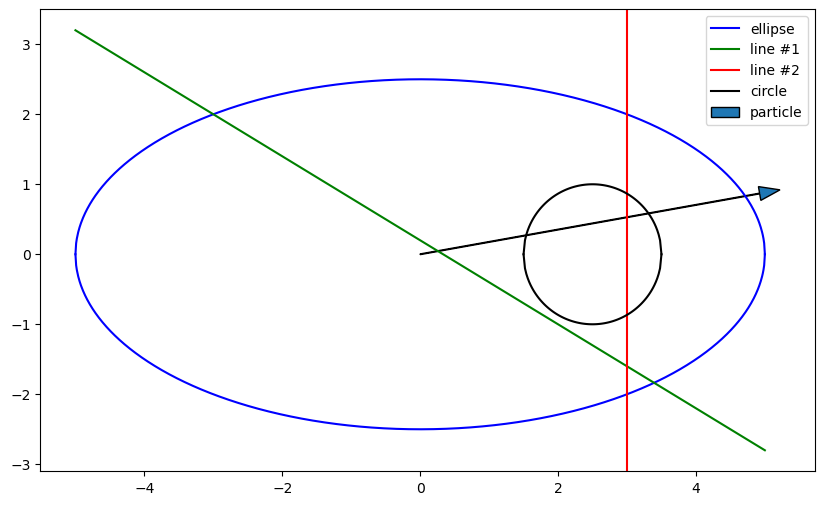

In [4]:
x_o = np.array([0,0])
v = np.array([np.cos(np.pi * 10/180), np.sin(np.pi * 10/180)])

plot_geometry()
plt.arrow(x_o[0], x_o[1], 5*v[0], 5*v[1], shape="full", width=0.01, head_width=0.2, label="particle")
plt.legend()
plt.show()

The ray is described by
$(x,y) = (0,0) + (\cos{10^o}, \sin{10^o})s$

There are 5 intersection points to be found:

1. particle with line #1

$ s\sin{10^o}  = -0.6s\cos{10^o} + 0.2$

$ s\left(\sin{10^o} + 0.6\cos{10^o} \right) = 0.2$

$ s = \frac{0.2}{\left(\sin{10^o} + 0.6\cos{10^o} \right)} = 0.261598 $

$(x_o, y_o) = (0.25762, 0.045426)$

2. particle with circle - close

$(x-2.5)^2 + y^2 = 1$

$(su-2.5)^2 + (sv)^2 = 1$

$u^2s^2 - 5su +6.25 +v^2s^2 -1 = (u^2 + v^2)s^2 -5su + 5.25 = s^2 - 5 s\cos{10^o} + 5.25 = 0$

$ s = \frac{5\cos{10^o} \pm \sqrt{5^2\cos{10^o}^2 - 4(5.25)}}{2} = \frac{4.92405 \pm 1.80171}{2}$

$ s = 1.56116 , 3.36287 $

$(x_2,y_2) = (1.537447, 0.27109)$

3. particle with line #2

$x = 3$

$su = 3 = s\cos{10^o}$

$s = \frac{3}{\cos{10^o}} = 3.04628 $

$(x_4, y_4) = (3, 0.52898)$

4. particle with circle - far

$(x_3,y_3) = (3.31178, 0.58396)$

5. particle with ellipse

$\frac{x^2}{5^2} + \frac{y^2}{2.5^2} = 1$

$\frac{s^2u^2}{5^2} + \frac{s^2v^2}{2.5^2} = 1$

$s^2 \left( \frac{u^2}{5^2} + {v^2}{2.5^2} \right) = s^2 \left( \frac{u^2}{5^2} + {4v^2}{5^2} \right) 1$

$s^2 (u^2 + 4v^2) = 25$

$s = \pm\sqrt{\frac{25}{\cos^2{10^o} + 4\sin^2{10^o}}}$

$s = \pm 4.78812 $

$(x_5, y_5) = (4.71538, 0.83145)$



Intersection #1 happens as s=0.2615976610677839: (x_1, y_1) = [0.2576234  0.04542596]
Intersection #2 happens as s=1.561164544082081: (x_1, y_1) = [1.53744695 0.27109338]
Intersection #3 happens as s=3.362874220978959: (x_1, y_1) = [3.31178461 0.58395698]
Intersection #4 happens as s=3.046279835657235: (x_1, y_1) = [3.         0.52898094]
Intersection #5 happens as s=4.788118848626982: (x_1, y_1) = [4.71537656 0.83144811]


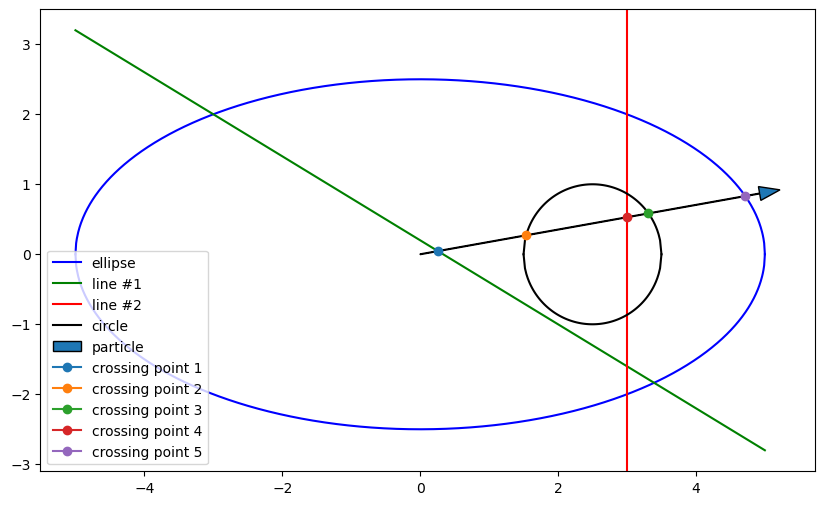

In [5]:
theta = np.pi * 10/180
s = np.zeros(5)

s[0] = 0.2/(v[1] + 0.6*v[0])
s[1] = (5*v[0] - np.sqrt(5**2 * v[0]**2 - 4*5.25))/2
s[2] = (5*v[0] + np.sqrt(5**2 * v[0]**2 - 4*5.25))/2
s[3] = 3/v[0]
s[4] = np.sqrt(25/(v[0]**2 + 4*v[1]**2))


plot_geometry()
plt.arrow(x_o[0], x_o[1], 5*v[0], 5*v[1], shape="full", width=0.01, head_width=0.2, label="particle")
for idx, ss in enumerate(s):
    print(f'Intersection #{idx+1} happens as s={ss}: (x_1, y_1) = {v*ss}')
    plt.plot(ss*v[0], ss*v[1], label=f"crossing point {idx+1}", marker="o")
plt.legend(loc="lower left")
plt.show()

## III. Particle tracking

This problem uses a different geometry than Parts I and II. Create an analytic expression for a circle that is centered at the origin, with a radius of 10 cm. Assume the circle is filled with a material whose linear attenuation coefficient, µ, is 0.5 cm$^{-1}$. On paper, determine the following. 

1. Sample for the particle's emission angle assuming a 2D isotropic source (i.e., uniform distribution between 0 and 2π) positioned at the origin, 
2. Find the distance along this direction to the geometry boundary.  How many mean free paths is this?
3. Sample the path length traveled by the particle prior to collision. How many mean free paths is this?
4. Did the particle escape the cell?  If so, where did it exit?  If not, assume a scattering event takes place and sample for a new scattering angle assuming isotropic scattering.

Now write a Python function program to accomplish each of the steps above. Your script should:

 - sample for source direction
 - calculate the distance to the boundary
 - sample for the distance to collision
 - sample for the scattering angle

Use your code to track the particle until it exits the geometry.  Plot the particle's path as you track it.



1. Sample a direction

$\theta = 2\pi \xi$

$(u,v) = (\cos\theta, \sin\theta)$

2. Distance to boundary

$x^2 + y^2 = 100$

$(x_o + su)^2 + (y_o + sv)^2 - 100 = (u^2 + v^2) s^2 + 2(ux_o + vy_o) + x_o^2 + y_o^2 -100 = s^2 + 2(ux_o + vy_o) + x_o^2 + y_o^2 - 100 = 0$

$s = - \frac{B \pm \sqrt{B^2 - 4AC}}{2A}$

$A = 1, B=2(ux_o + vy_o), C= x_o^2 + y_o^2 -100$

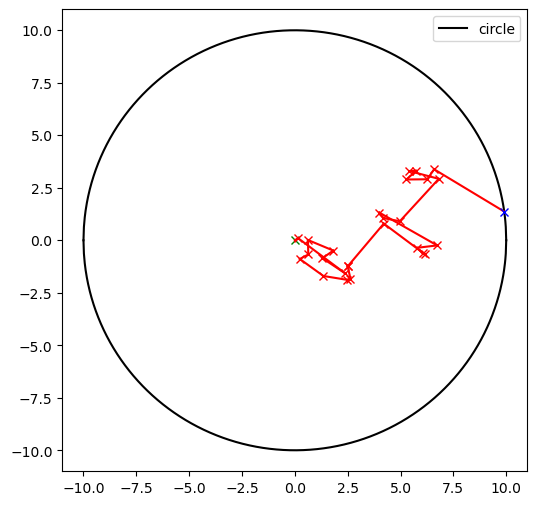

In [24]:
def sample_direction():
    theta = 2 * np.pi * np.random.rand()
    v = np.array([np.cos(theta), np.sin(theta)])
    return v

def dist_circle(x, v):
    A = 1
    B = 2*np.dot(x,v)
    C = np.dot(x,x) - 100
    
    s1 = - (B + np.sqrt(B**2 - 4*A*C))/(2*A)
    s2 = - (B - np.sqrt(B**2 - 4*A*C))/(2*A)
    
    return max(s1, s2)

def dist_collision_mfp():
    return -np.log(np.random.rand())

def inside_circle(x):
    return np.dot(x,x) < 100

def plot_circle():
    plt.figure(figsize=(6,6))
    x_domain = np.linspace(-10,10,1000)
    circle = np.sqrt(100 - x_domain**2)
    plt.plot(x_domain, circle, color="black", label="circle")
    plt.plot(x_domain, -circle, color="black")

def plot_event(x, event_type):
    color_map = {"source" : "green", "collision" : "red", "boundary" : "blue"}
    plt.plot(x[0],x[1], marker="x", color=color_map[event_type])

def plot_path(x1,x2):
    plt.plot((x1[0],x2[0]), (x1[1],x2[1]), color="red" )
    
sigma = 0.5 # cross-section
x = np.array([0,0]) # particle is born at the origin
v = sample_direction() # sample initial direction isotropically

plot_circle()
plot_event(x, "source")

s_collision = dist_collision_mfp()/sigma
s_boundary = dist_circle(x,v)

while s_collision < s_boundary:
    x_new = x + s_collision * v
    plot_path(x,x_new)
    x = x_new
    plot_event(x, "collision")
    v = sample_direction()
    s_collision = dist_collision_mfp()/sigma
    s_boundary = dist_circle(x,v)

x_new = x + s_boundary * v
plot_path(x, x_new)
plot_event(x_new, "boundary")

plt.legend()
plt.show()